# Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance

### Introduction

   This project focuses on technical analysis, data visualization, and stock price prediction using data from Yahoo Finance. It involves analyzing historical data from major technology stocks and other companies to gain insights into market trends. The project leverages pandas for retrieving stock information, visualizing various metrics, and exploring methods to assess stock risk based on past performance.

### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [3]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing Yahoo Finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = yf.download(stock,start = start,end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's explore the AAPL (Apple) stock DataFrame to familiarize ourselves with the data.

In [4]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.655365,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.237411,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.282288,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,184.685211,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.013611,40444700


In [5]:
# Summery stats for Apple Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,207.635080,209.594040,205.879520,207.880480,207.455447,5.686729e+07
std,25.499494,25.717995,25.267213,25.622994,25.833922,3.091622e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.323470e+07
25%,184.080006,185.547501,182.445004,184.442497,183.755116,4.161192e+07
50%,215.760002,218.070000,212.860001,216.495003,216.131966,4.970535e+07
75%,227.872494,229.487499,225.439999,227.565006,227.292435,6.259602e+07
max,258.190002,260.100006,257.630005,259.019989,259.019989,3.186799e+08


In [6]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-08 to 2025-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


 Let's plot the volume and closing prices of AAPL (Apple) stocks.

<Axes: xlabel='Date'>

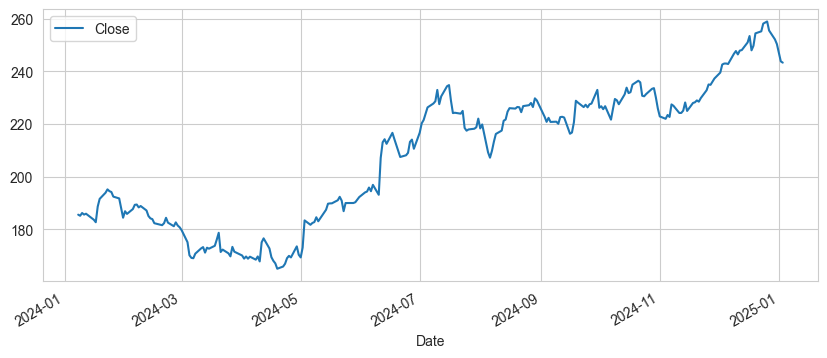

In [7]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

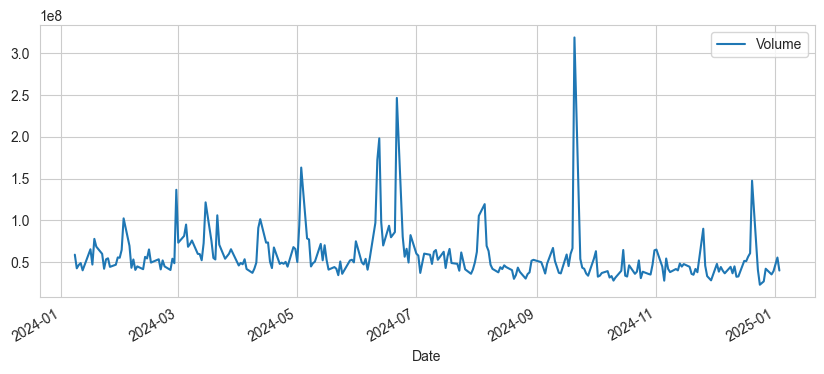

In [8]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

We can see that on Oct 2024 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


In [9]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

Now, lets plot all the additional Moving Averages for AAPL stock

<Axes: xlabel='Date'>

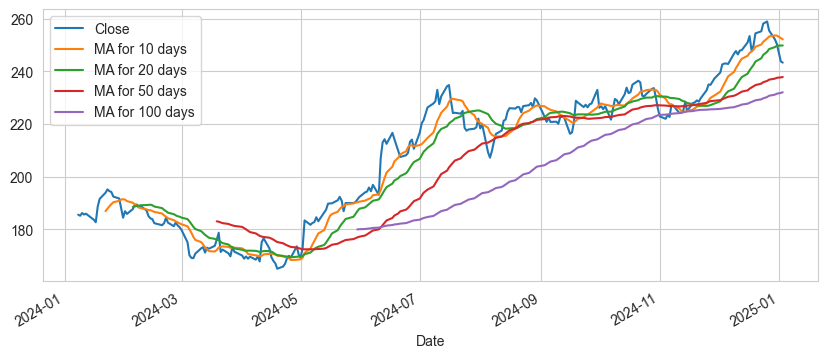

In [10]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


With the baseline analysis complete, let's delve deeper by assessing the stock's risk.  

To achieve this, we'll focus on the stock's daily changes rather than its absolute values. Using pandas, we'll calculate the daily returns for the AAPL stock.

<Axes: xlabel='Date'>

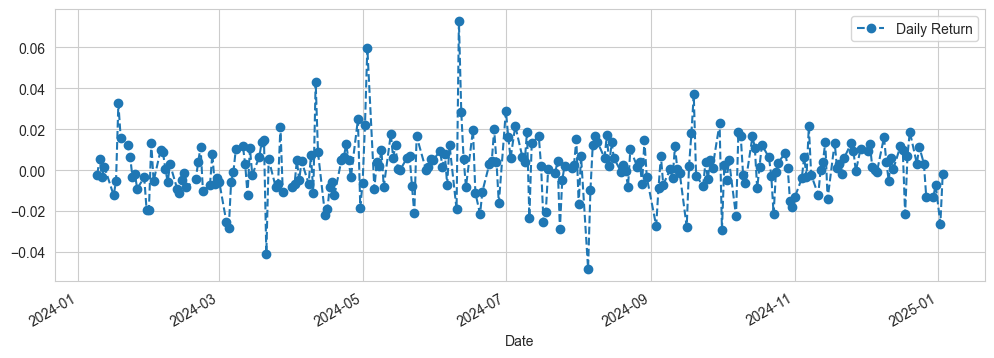

In [11]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

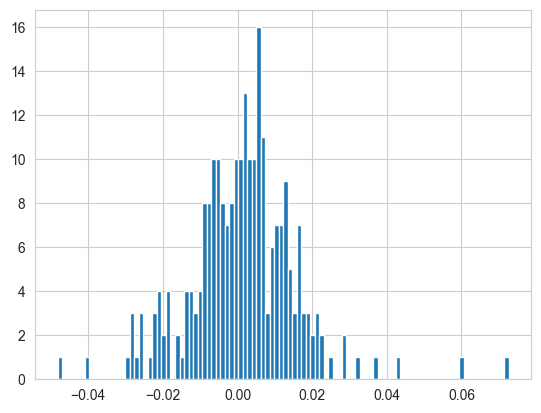

In [12]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

<Axes: xlabel='Daily Return', ylabel='Count'>

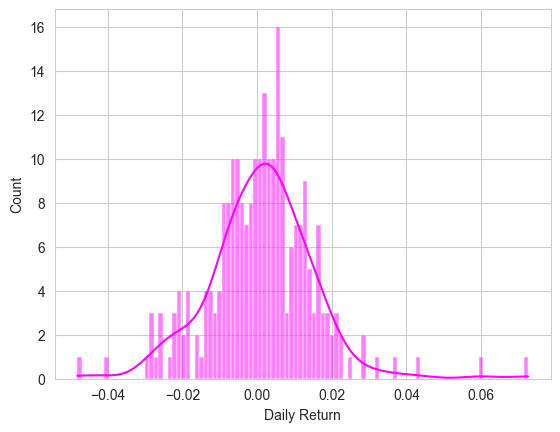

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', kde=True)

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = pd.DataFrame()  

for stock in tech_list:
    stock_data = yf.download(stock, start=start, end=end)  
    closingprice_df[stock] = stock_data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
closingprice_df.head(10)

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2024-01-08,185.559998,138.839996,374.690002,149.100006
2024-01-09,185.139999,140.949997,375.790009,151.369995
2024-01-10,186.190002,142.279999,382.769989,153.729996
2024-01-11,185.589996,142.080002,384.630005,155.179993
2024-01-12,185.919998,142.649994,388.470001,154.619995
2024-01-16,183.630005,142.490005,390.269989,153.160004
2024-01-17,182.679993,141.470001,389.470001,151.710007
2024-01-18,188.630005,143.479996,393.869995,153.500000
2024-01-19,191.559998,146.380005,398.670013,155.339996


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [16]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [17]:
tech_returns.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2024-01-08,NaN,NaN,NaN,NaN
2024-01-09,-0.002263,0.015197,0.002936,0.015225
2024-01-10,0.005671,0.009436,0.018574,0.015591
2024-01-11,-0.003223,-0.001406,0.004859,0.009432
2024-01-12,0.001778,0.004012,0.009984,-0.003609


Compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

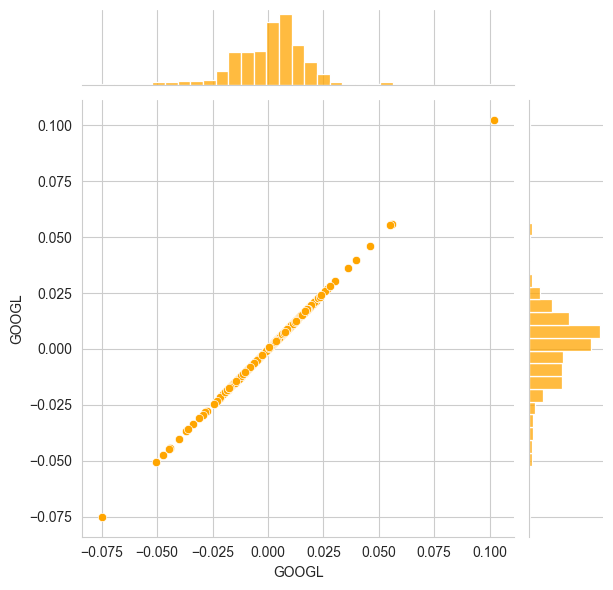

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Let's go ahead and compare Google and Amazon the same way.

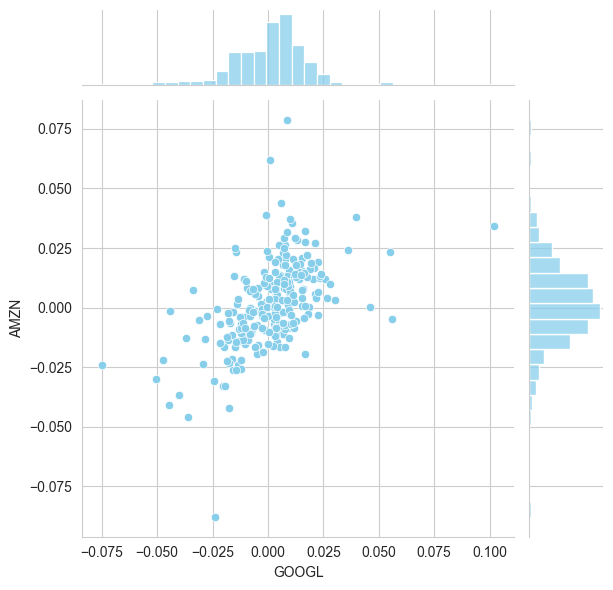

In [19]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', color='skyblue')

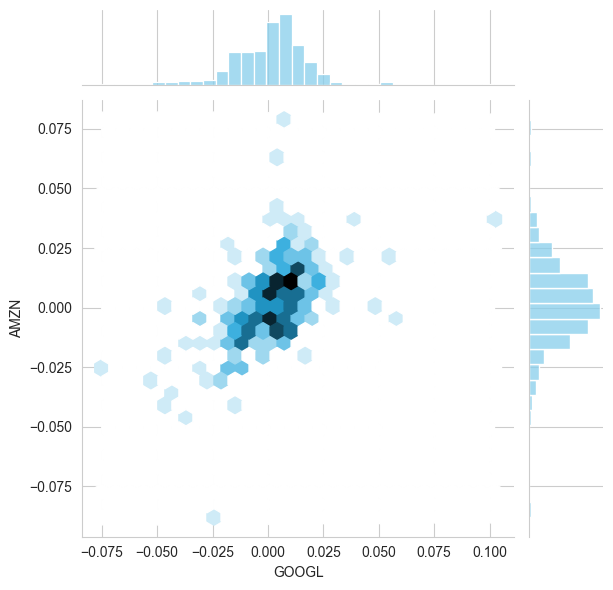

In [20]:
# with Hex plot
sns.jointplot(data=tech_returns, x='GOOGL', y='AMZN', kind='hex', color='skyblue')

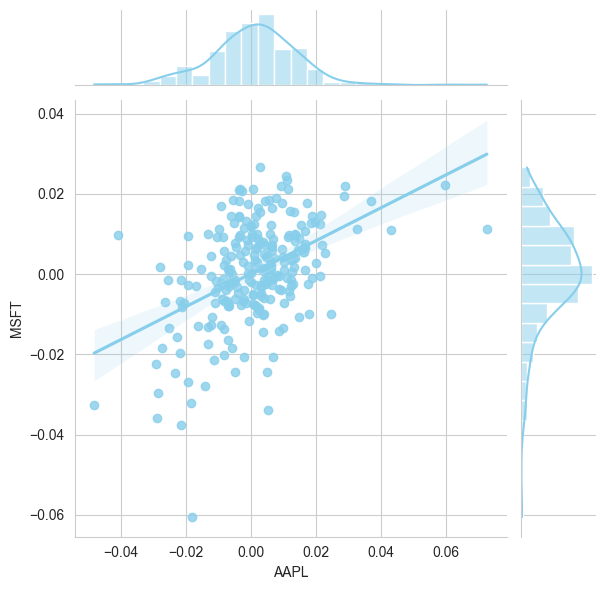

In [21]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot(data=tech_returns, x='AAPL', y='MSFT', kind='reg', color='skyblue')

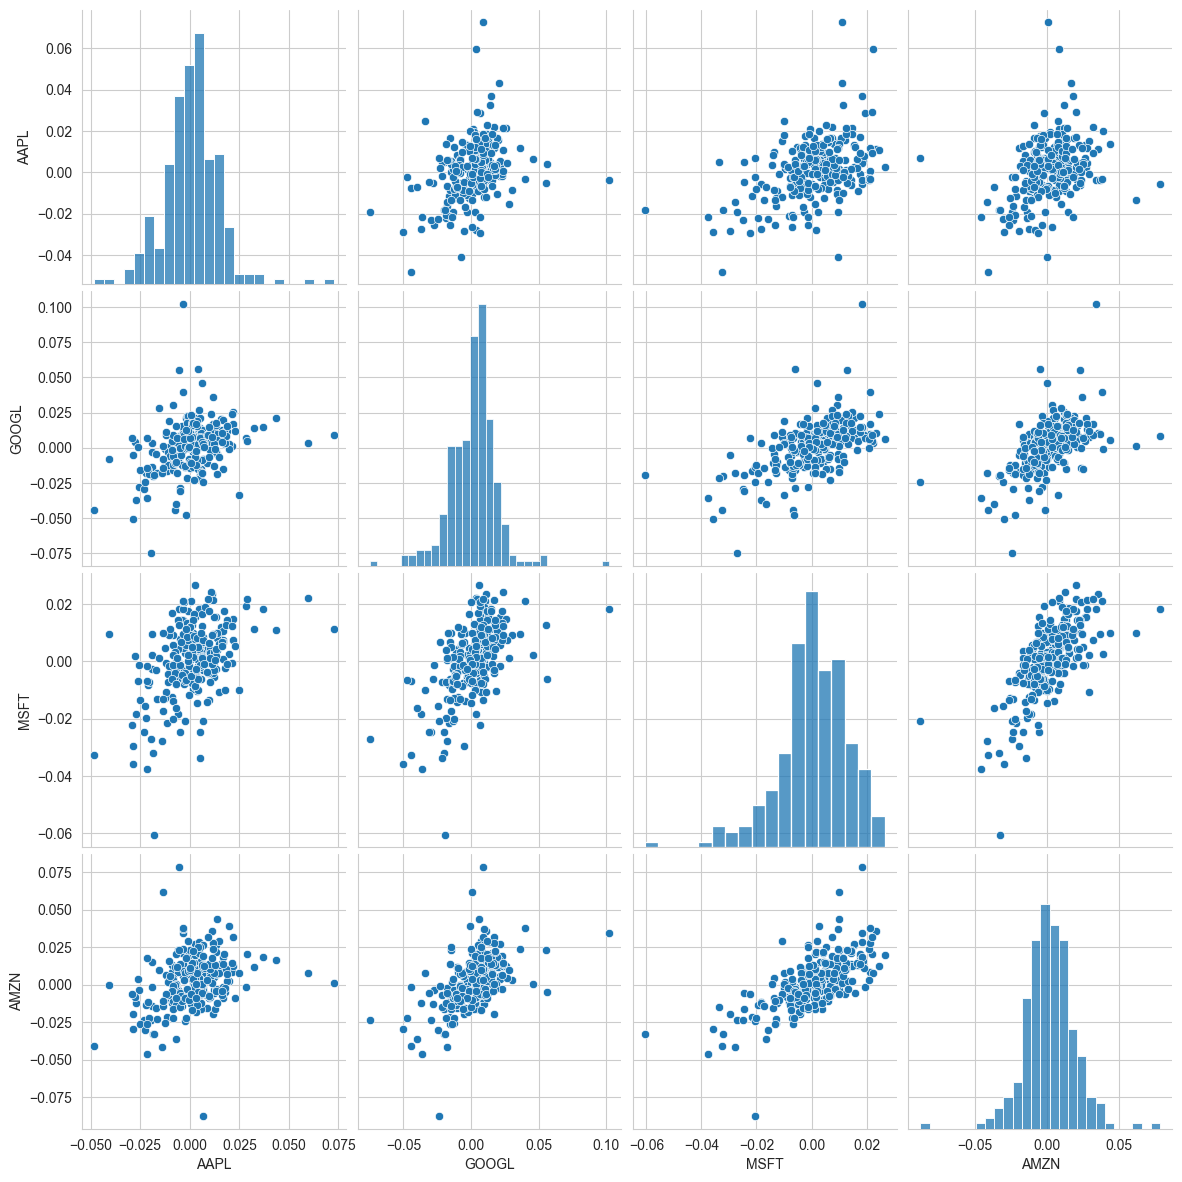

In [22]:
# Call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(), height=3)

The pairplot shows distributions and correlations of daily returns for AAPL, GOOGL, MSFT, and AMZN. The histograms reveal normally distributed returns, while scatterplots indicate strong positive correlations between these stocks, typical of the tech sector. Outliers highlight abnormal returns, useful for risk analysis.

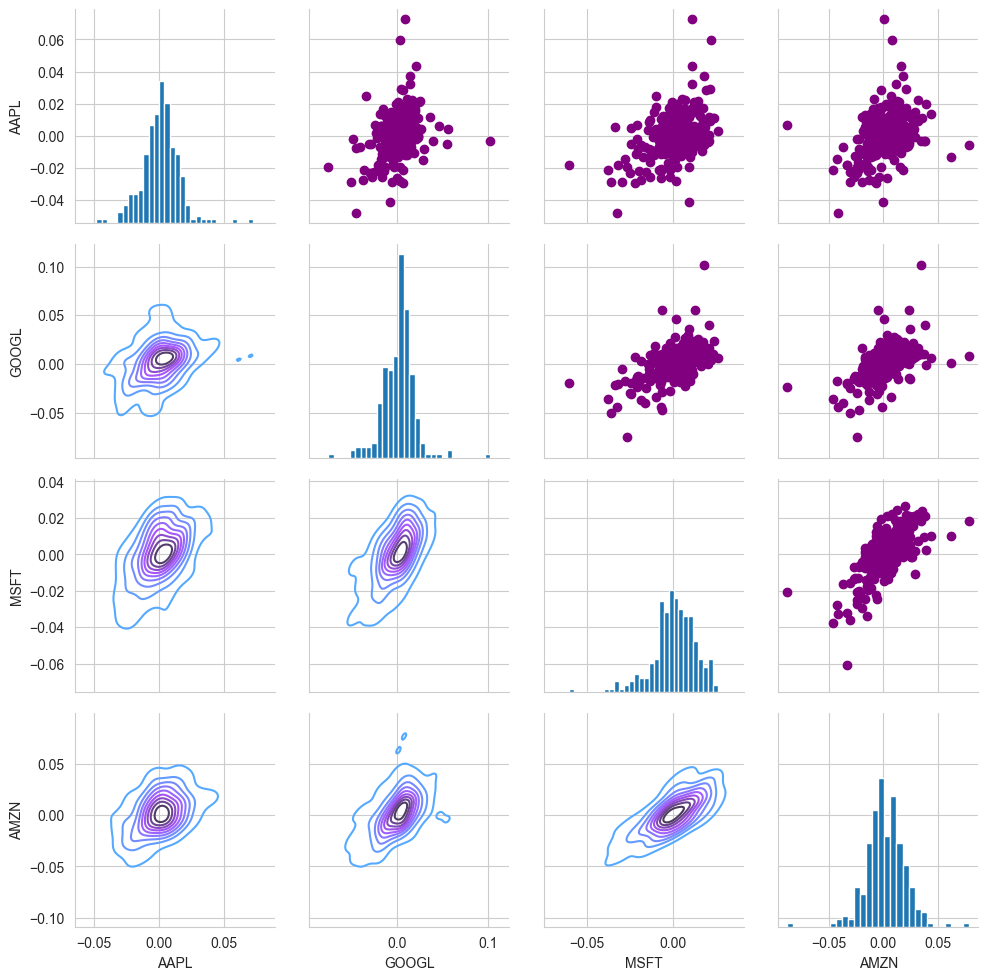

In [23]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique.

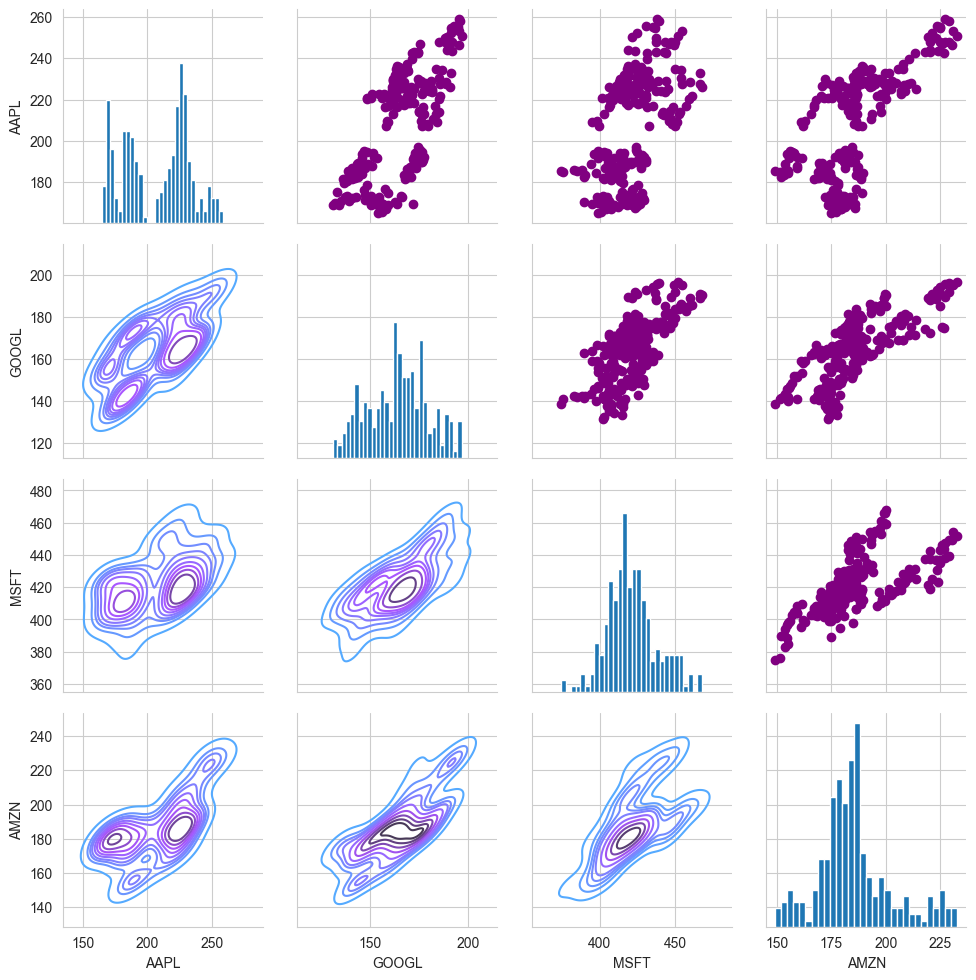

In [24]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

<Axes: >

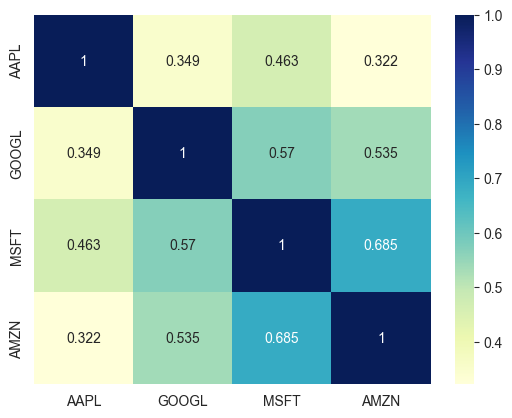

In [25]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: >

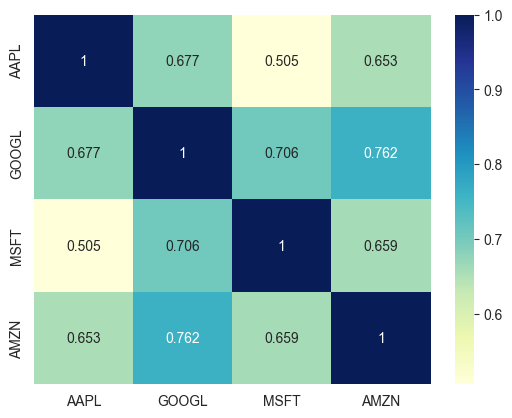

In [26]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

AAPL and GOOGL: Correlation coefficient is 0.68, indicating a strong relationship.

AAPL and MSFT: Correlation coefficient is 0.509, indicating a moderate relationship.

AAPL and AMZN: Correlation coefficient is 0.655, indicating a strong relationship.

GOOGL and MSFT: Correlation coefficient is 0.714, indicating a strong relationship.

MSFT and AMZN: Correlation coefficient is 0.677, indicating a strong relationship.

GOOGL and AMZN: Correlation coefficient is 0.769, indicating a very strong relationship.

### Conclusion
 Change in Relationships: Compared to the first heatmap, the second heatmap shows a significant increase in correlation between the stocks. Specifically, the relationship between AAPL and GOOGL improved from 0.355 to 0.68, indicating a stronger connection.

Strong Relationships: The stocks GOOGL and AMZN exhibit a very strong relationship (0.769) in the second heatmap, suggesting they may move in tandem in the market.

Overall Insight: The increase in correlation coefficients suggests that these stocks may be interacting more in recent times, possibly due to common market factors or economic events affecting the entire tech industry.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [27]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [28]:
rets.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2024-01-09,-0.002263,0.015197,0.002936,0.015225
2024-01-10,0.005671,0.009436,0.018574,0.015591
2024-01-11,-0.003223,-0.001406,0.004859,0.009432
2024-01-12,0.001778,0.004012,0.009984,-0.003609
2024-01-16,-0.012317,-0.001122,0.004634,-0.009442


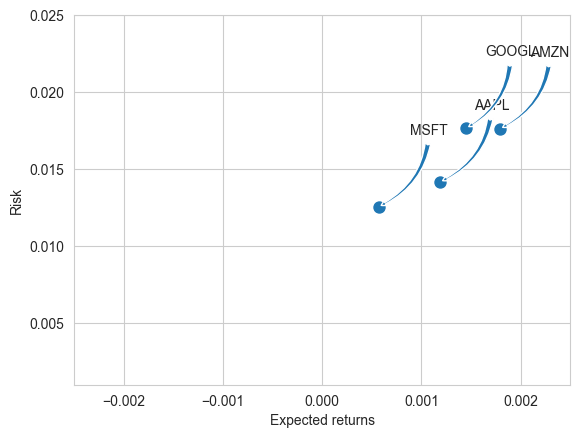

In [29]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. 

Let's go ahead and repeat the daily returns histogram for Apple stock.

<Axes: xlabel='Daily Return', ylabel='Count'>

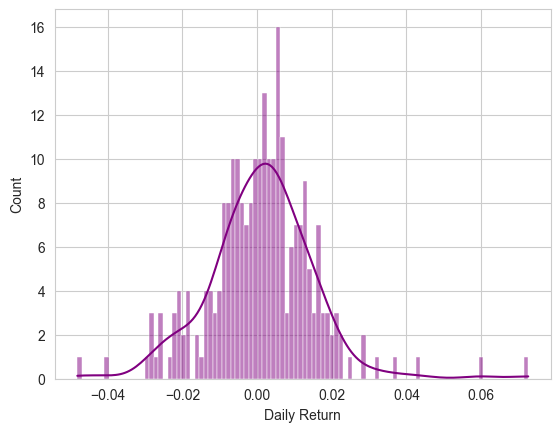

In [30]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', kde=True)

Now we can use quantile to get the risk value for the stock.

In [31]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.02176730770980482

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [32]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.02409402798551441

In [33]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.026350515965986962

In [34]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.02201140795526979

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


In [35]:
rets.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2024-01-09,-0.002263,0.015197,0.002936,0.015225
2024-01-10,0.005671,0.009436,0.018574,0.015591
2024-01-11,-0.003223,-0.001406,0.004859,0.009432
2024-01-12,0.001778,0.004012,0.009984,-0.003609
2024-01-16,-0.012317,-0.001122,0.004634,-0.009442


In [36]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [37]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [38]:
# For Google Stock - GOOGL
GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.338516,21404000
2024-01-09,138.500000,141.490005,138.149994,140.949997,140.440887,24759600
2024-01-10,141.000000,143.000000,140.910004,142.279999,141.766083,21320200
2024-01-11,143.490005,145.220001,140.639999,142.080002,141.566818,24008700
2024-01-12,142.669998,143.199997,141.820007,142.649994,142.134735,18768600


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

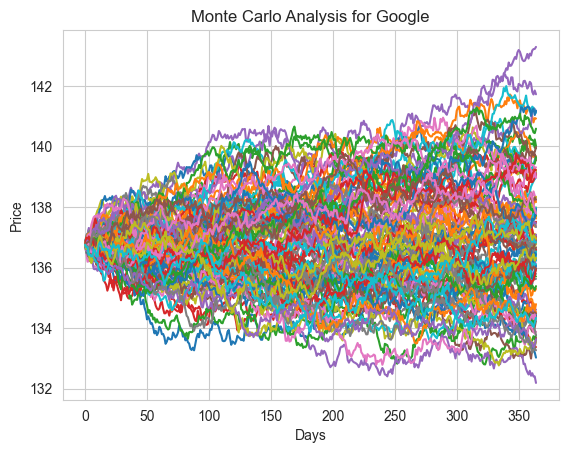

In [39]:
start_price = 136.75

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [40]:
# For Amazon Stock - AMZN
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

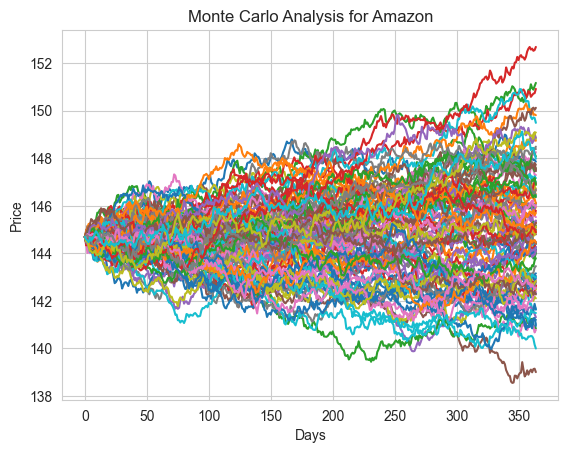

In [41]:
start_price = 144.69

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [42]:
# For Apple Stock - AAPL
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.655365,59144500,NaN,NaN,NaN,NaN,NaN
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.237411,42841800,NaN,NaN,NaN,NaN,-0.002263
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.282288,46792900,NaN,NaN,NaN,NaN,0.005671
2024-01-11,186.539993,187.050003,183.619995,185.589996,184.685211,49128400,NaN,NaN,NaN,NaN,-0.003223
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.013611,40444700,NaN,NaN,NaN,NaN,0.001778


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

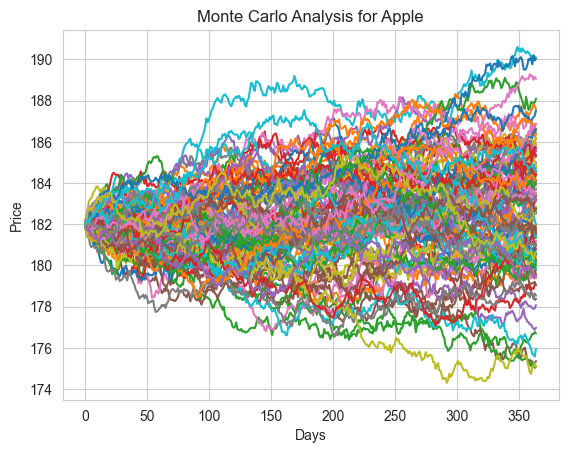

In [43]:
start_price = 181.99

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [44]:
# For Microsoft Stock - MSFT
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,369.299988,375.200012,369.010010,374.690002,372.653351,23134000
2024-01-09,372.010010,375.989990,371.190002,375.790009,373.747345,20830000
2024-01-10,376.369995,384.170013,376.320007,382.769989,380.689392,25514200
2024-01-11,386.000000,390.679993,380.380005,384.630005,382.539337,27850800
2024-01-12,385.489990,388.679993,384.649994,388.470001,386.358429,21645700


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

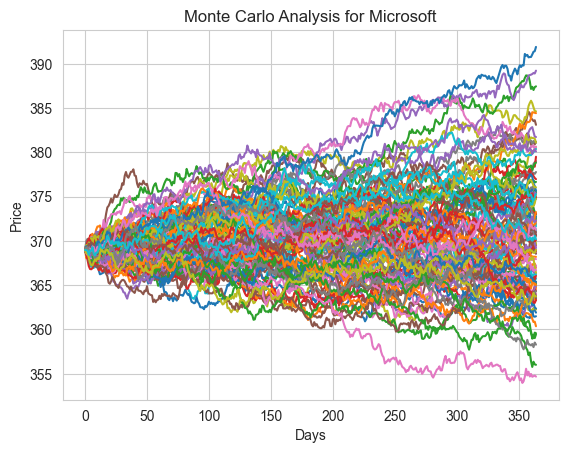

In [45]:
start_price = 368.97

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [46]:
# Lets start with Google stock price
start_price = 136.75

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.


Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

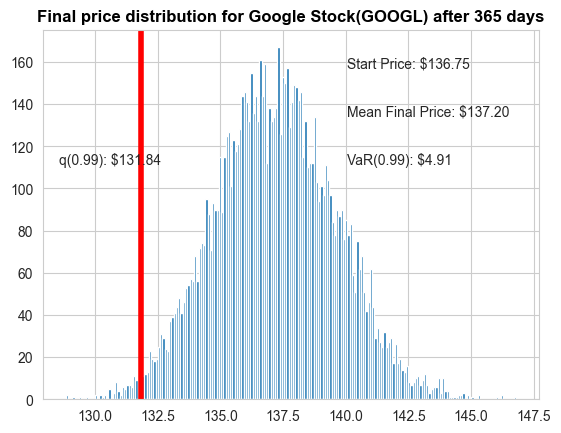

In [47]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='black')


Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $5.10 for every investment of 
$136.75.

This basically means for every initial GOOGL stock you purchase you're putting about $5.10 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [48]:
# For Amazon Stock Price
start_price = 144.69

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

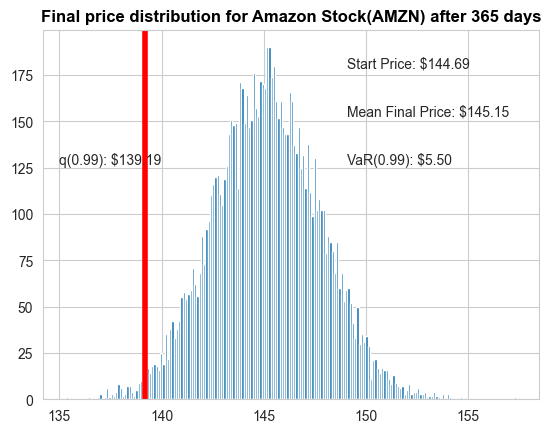

In [49]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='black')

This basically means for every initial AMZN stock you purchase you're putting about $5.40 at risk 99% of the time from our Monte Carlo Simulation.

In [50]:
# For Apple Stock Price
start_price = 181.99

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

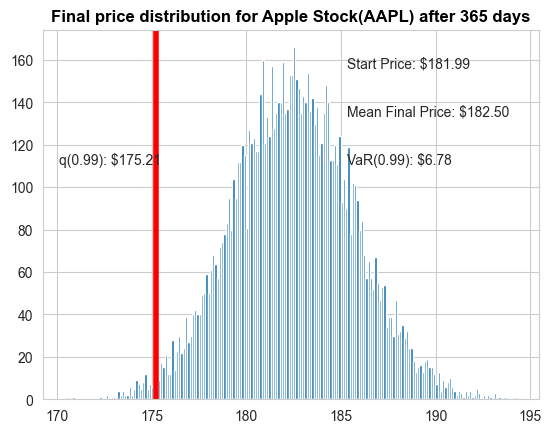

In [51]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='black')

Great! This basically means for every initial AAPL stock you purchase you're putting about $6.54 at risk 99% of the time from our Monte Carlo Simulation.

In [52]:
# For Microsoft Stock Price
start_price = 368.97

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

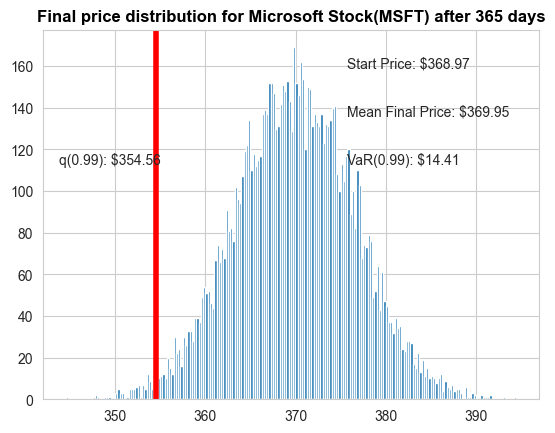

In [53]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='black')

Nice, This basically means for every initial MSFT stock you purchase you're putting about $13.55 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.

By using the above methods to get Value at Risk.

In [54]:
# List of other stock
list = ['VFS','NKE','NVDA']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

# For-loop for grabbing Yahoo Finance data and setting as a dataframe
for stock in list:
    globals()[stock] = yf.download(stock, start=start, end=end)  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's go ahead and play aorund with the VinFast Stock DataFrame to get a feel for the data.

In [55]:
VFS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,7.05,7.190,6.75,6.79,6.79,3767900
2024-01-09,6.75,6.870,6.41,6.65,6.65,3327700
2024-01-10,6.61,6.740,6.43,6.72,6.72,2500800
2024-01-11,6.70,6.965,6.56,6.76,6.76,2216500
2024-01-12,6.73,6.950,6.53,6.59,6.59,1871500


In [56]:
VFS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.00000,250.00000,2.500000e+02
mean,4.331720,4.462540,4.190592,4.32376,4.32376,1.676348e+06
std,0.866002,0.891425,0.829875,0.85844,0.85844,1.633242e+06
min,2.470000,2.507000,2.255000,2.42000,2.42000,2.986000e+05
25%,3.802500,3.870000,3.712500,3.80250,3.80250,7.676250e+05
50%,4.110000,4.250000,4.000000,4.11500,4.11500,1.240450e+06
75%,4.870000,5.027500,4.707500,4.87000,4.87000,1.950450e+06
max,7.050000,7.190000,6.750000,6.79000,6.79000,1.539630e+07


In [57]:
VFS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-08 to 2025-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of other stocks.

<Axes: title={'center': 'Closing Price - VFS'}, xlabel='Date'>

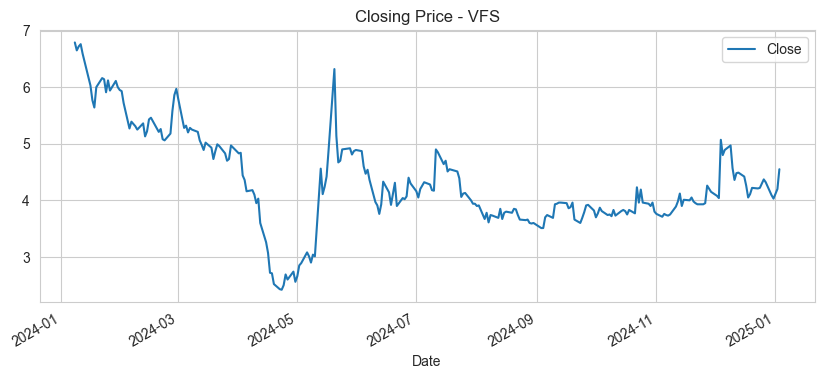

In [58]:
# Let's see a historical view of the closing price for VìnFast
VFS['Close'].plot(title='Closing Price - VFS',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

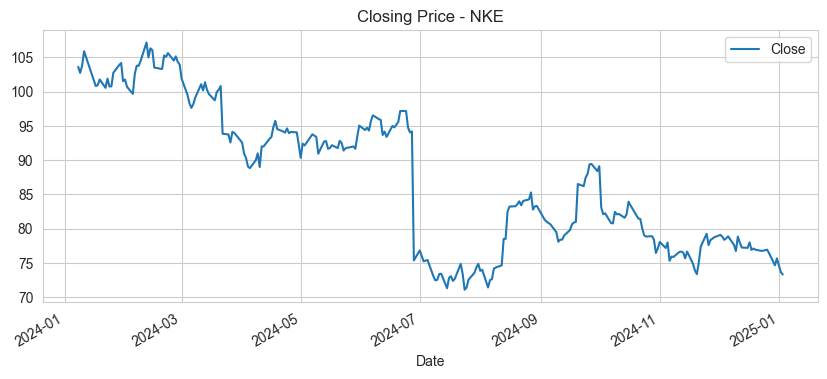

In [59]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - NVDA'}, xlabel='Date'>

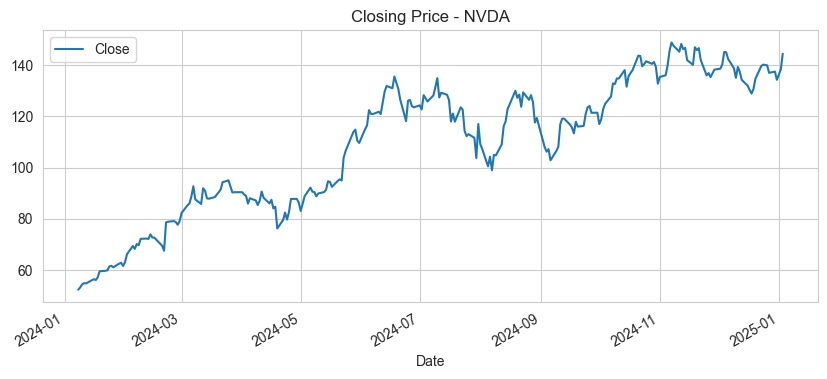

In [71]:
# Let's see a historical view of the closing price for NVDA
NVDA['Close'].plot(title='Closing Price - NVDA',legend=True, figsize=(10,4))

### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [62]:
# We'll use pct_change to find the percent change for each day

#For VFS stocks
VFS['Daily Return'] = VFS['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Count'>

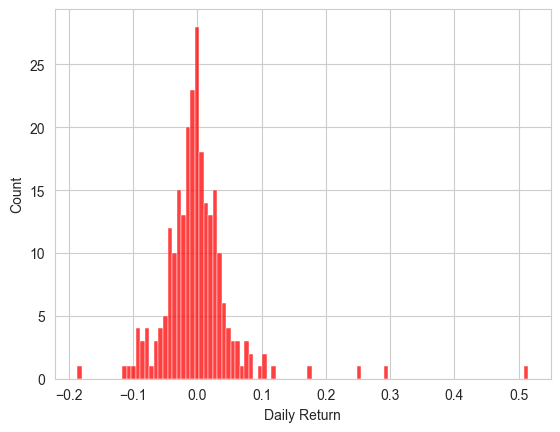

In [64]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(VFS['Daily Return'].dropna(), bins=100, color='red')  

In [65]:
(VFS['Daily Return'].dropna()).quantile(0.05)

-0.07750580412161343

The 0.05 empirical quantile of VFS stock daily returns is at -0.0775. That means that with 95% confidence, our worst daily loss will not exceed 7.75%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0775 * 1,000,000 = $77,500.

In [72]:
# For NVDA stocks
NVDA['Daily Return'] = NVDA['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Count'>

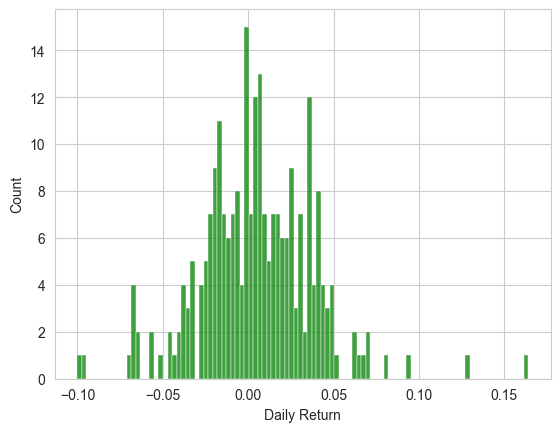

In [74]:
sns.histplot(NVDA['Daily Return'].dropna(),bins=100,color='Green')

In [75]:
(NVDA['Daily Return'].dropna()).quantile(0.05)

-0.04707769903152805

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.013 * 1,000,000 = $13,000.

In [66]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

<Axes: xlabel='Daily Return', ylabel='Count'>

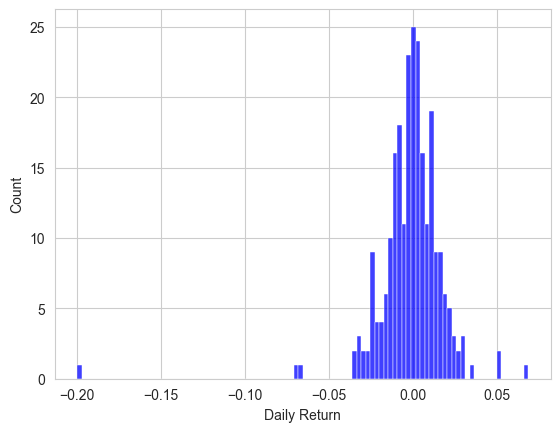

In [68]:
sns.histplot(NKE['Daily Return'].dropna(), bins=100, color='blue')

In [69]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.025223970255507554

The 0.05 empirical quantile of NKE stock daily returns is at -0.25. 
That means that with 95% confidence, our worst daily loss will not exceed 25%. 
If we have a 1 million dollar investment, our one-day 5% VaR is 0.25 * 1,000,000 = $250,000.